In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
train.shape

(1459, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
train[['hour', 'count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


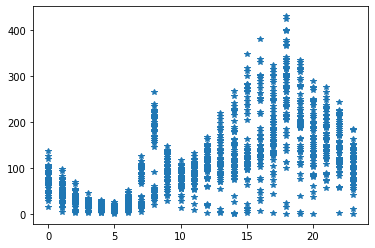

In [ ]:
import matplotlib.pyplot as plt
plt.plot('hour', 'count', '*', data=train)

In [ ]:
# 상관관계
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


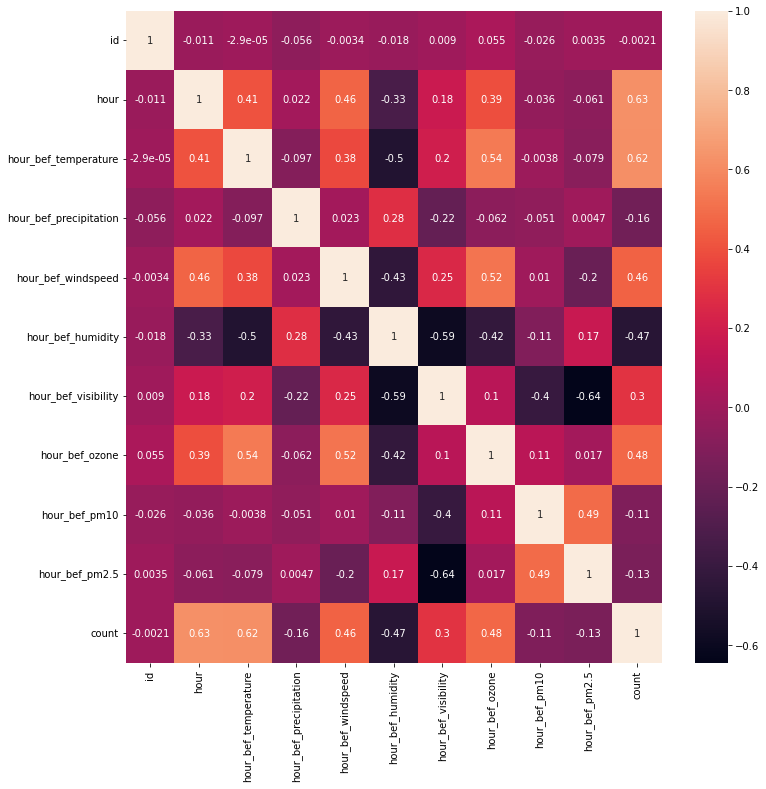

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True)

In [ ]:
# 결측치 처리
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [ ]:
#na_cols = train.loc(train.isna().sum() != 0)
#na_cols

In [ ]:
temp = train.isna().sum()

In [ ]:
temp = temp[temp!=0].index
temp

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
def fill_by_mean(df, cols):
  for col in cols:
    df[col] = df[col].fillna(value=df[col].mean())

fill_by_mean(train, temp)

In [ ]:
fill_by_mean(test, temp)

In [ ]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
y_train = train['count']
X_train = train.drop(['id', 'count'], axis=1)
X_test = test.drop(['id'], axis=1)

In [ ]:
# model
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
params = {'min_samples_split':[30,50,70], 'max_depth':[5,6,7], 'n_estimators':[50, 100, 200]}
gs = GridSearchCV(estimator = rf_r, param_grid=params, scoring='neg_mean_squared_error', cv=3)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 200}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'min_samples_split':range(30, 70), 'max_depth':[5, 6, 7], 'n_estimators':range(50, 250)}
rs = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=params, n_iter=30, random_state=0, scoring='neg_mean_squared_error', n_jobs=-1)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [ ]:
rs.best_params_

{'max_depth': 7, 'min_samples_split': 34, 'n_estimators': 171}

In [ ]:
rs.best_score_

-1711.2206606101663

In [ ]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.570430,0.016973,0.025630,0.002189,127,69,5,"{'n_estimators': 127, 'min_samples_split': 69,...",-1900.658151,-2256.519065,-1860.190083,-2001.514752,-1639.332111,-1931.642832,200.966542,30
12,0.384280,0.010725,0.017544,0.000587,82,69,6,"{'n_estimators': 82, 'min_samples_split': 69, ...",-1887.341181,-2230.354688,-1819.065997,-2027.968239,-1618.075463,-1916.561114,205.100337,29
22,0.316836,0.019937,0.014571,0.000471,66,61,5,"{'n_estimators': 66, 'min_samples_split': 61, ...",-1867.719514,-2250.563461,-1790.767151,-2011.561578,-1645.270713,-1913.176483,206.074493,28
13,0.870103,0.003227,0.035218,0.001914,194,63,5,"{'n_estimators': 194, 'min_samples_split': 63,...",-1882.107348,-2218.977888,-1826.631391,-2010.319122,-1623.190879,-1912.245325,197.734090,27
23,0.775039,0.007339,0.031833,0.001882,171,64,5,"{'n_estimators': 171, 'min_samples_split': 64,...",-1850.332204,-2204.185076,-1831.158805,-2026.843326,-1634.413187,-1909.386520,192.831331,26
24,0.387833,0.008346,0.017771,0.000569,86,60,5,"{'n_estimators': 86, 'min_samples_split': 60, ...",-1877.300263,-2191.973259,-1820.486341,-1988.081253,-1586.460552,-1892.860333,198.945471,25
11,0.372003,0.006809,0.018094,0.001140,80,67,6,"{'n_estimators': 80, 'min_samples_split': 67, ...",-1855.458281,-2244.487926,-1761.605750,-1965.192565,-1617.399114,-1888.828727,211.328280,24
26,0.558387,0.003193,0.023125,0.000265,122,55,5,"{'n_estimators': 122, 'min_samples_split': 55,...",-1837.517590,-2164.957256,-1783.744753,-1993.114739,-1612.480923,-1878.363052,187.945986,23
27,0.464824,0.009475,0.020410,0.000663,101,54,5,"{'n_estimators': 101, 'min_samples_split': 54,...",-1813.526736,-2204.753482,-1782.496120,-1977.610483,-1548.176245,-1865.312613,218.149829,22
15,0.472386,0.008172,0.020186,0.000562,100,63,6,"{'n_estimators': 100, 'min_samples_split': 63,...",-1835.635260,-2161.667105,-1752.315129,-1990.891847,-1584.979270,-1865.097722,197.904956,21
